# Projeto 2 - Ciência dos Dados


Nome: Beatriz Bobrow Bozzo
    
Nome: Mariana Cézar

Nome: Rodrigo Nigri Griner

Nome: Thais Sztamfater Groberman

___
## Contextualização



Doenças cardiovasculares são distúrbios do coração e de vasos sanguíneos. Esses incluem ateques cardíacos, derrames e insuficiência cardíaca, entre outras. Dessa forma, ao todo, doenças cardiovasculares representam cerca de 17 milhões de morte no mundo anualmente.

Nesse estudo, será considerado pacientes que possuem insuficiência cardíaca, ou seja, quando o coração não possui força suficiente para bombear todo sangue necessário para o corpo. Essa doença está geralmente atrelada à condições como anemia, dibetes, hipertensão, entre outras.

O dataset utilizado no projeto contém o prontuário de 299 pacientes e apresenta as seguintes informações:
- age: Idade do paciente (anos)
- anaemia: Ausência de glóbulos vermelhos ou hemoglobina
- high blood pressure: Paciente tem hipertensão
- creatinine phosphokinase (CPK): quantidade de enzima CPK no sangue (mcg/L)
- diabetes: Paciente tem diabetes
- ejection fraction: Porcentagem de sangue saindo do coração a cada sístole
- platelets: Quantidade de plaquetas no sangue (kiloplatelets/mL)
- sex: Mulher ou homem
- serum creatinine:  Quantidade de creatinina no sangue (mg/dL)
- serum sodium: Quantidade de sodio no sangue (mEq/L)
- smoking: Paciente fuma
- time: Tempo em que o paciente foi estudado (dias)
- death event: Paciente morreu durante o tempo em que participou do estudo

Analisando essas informações, seria possível observar padrões e auxiliar os médicos a preverem se o **paciente irá a óbito durante o tempo de estudo?** 

Dessa forma, os features serão as informações do prontuário enquanto que o target será se o paciente faleceu.

Como o target do nosso projeto é uma variável qualitativa, será utilizado o método de **Classificadores**.



___
## Lendo o Dataset

#### Importando as bibliotecas necessárias

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import numpy as np
import os
from IPython.display import display

##### Verificando o diretório em que o arquivo está

In [2]:
filename = 'heart_failure_clinical_records_dataset.xlsx'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo heart_failure_clinical_records_dataset.xlsx!


##### Lendo o dataset

In [3]:
dados = pd.read_excel(filename)
dados

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Sendo:
- age: Idade do paciente (anos)
- anaemia: Ausência de glóbulos vermelhos ou hemoglobina (0 = Não; 1 = Sim)
- high blood pressure: Paciente tem hipertensão (0 = Não; 1 = Sim)
- creatinine phosphokinase (CPK): quantidade de enzima CPK no sangue (mcg/L)
- diabetes: Paciente tem diabetes (0 = Não; 1 = Sim)
- ejection fraction: Porcentagem de sangue saindo do coração a cada sístole
- platelets: Quantidade de plaquetas no sangue (kiloplatelets/mL)
- sex: Mulher ou homem (0 = Mulher; 1 = Homem)
- serum creatinine:  Quantidade de creatinina no sangue (mg/dL)
- serum sodium: Quantidade de sodio no sangue (mEq/L)
- smoking: Paciente fuma (0 = Não; 1 = Sim)
- time: Tempo em que o paciente foi estudado (dias)
- death event: Paciente morreu durante o tempo em que participou do estudo (0 = Não; 1 = Sim)

In [4]:
# Definindo os tipos das variáveis de cada coluna
dados.age = dados.age.astype('int')
dados.anaemia = dados.anaemia.astype('category')
dados.creatinine_phosphokinase = dados.creatinine_phosphokinase.astype('int')
dados.diabetes = dados.diabetes.astype('category')
dados.ejection_fraction = dados.ejection_fraction.astype('int')
dados.high_blood_pressure = dados.high_blood_pressure.astype('category')
dados.platelets = dados.platelets.astype('float')
dados.serum_creatinine = dados.serum_creatinine.astype('float')
dados.serum_sodium = dados.serum_sodium.astype('int')
dados.sex = dados.sex.astype('category')
dados.smoking = dados.smoking.astype('category')
dados.time = dados.time.astype('int')
dados.DEATH_EVENT = dados.DEATH_EVENT.astype('category')

# Substrituindo os códigos numéricos por seus significados
dados.anaemia.cat.categories = (['Não', 'Sim'])
dados.diabetes.cat.categories  = (['Não', 'Sim'])
dados.high_blood_pressure.cat.categories  = (['Não', 'Sim'])
dados.sex.cat.categories  = (['Mulher', 'Homem'])
dados.smoking.cat.categories  = (['Não', 'Sim'])
dados.DEATH_EVENT.cat.categories  = (['Não', 'Sim'])

dados.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62,Não,61,Sim,38,Sim,155000.0,1.1,143,Homem,Sim,270,Não
295,55,Não,1820,Não,38,Não,270000.0,1.2,139,Mulher,Não,271,Não
296,45,Não,2060,Sim,60,Não,742000.0,0.8,138,Mulher,Não,278,Não
297,45,Não,2413,Não,38,Não,140000.0,1.4,140,Homem,Sim,280,Não
298,50,Não,196,Não,45,Não,395000.0,1.6,136,Homem,Sim,285,Não


In [5]:
# Verificando se há colunas sem dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null int32
anaemia                     299 non-null category
creatinine_phosphokinase    299 non-null int32
diabetes                    299 non-null category
ejection_fraction           299 non-null int32
high_blood_pressure         299 non-null category
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int32
sex                         299 non-null category
smoking                     299 non-null category
time                        299 non-null int32
DEATH_EVENT                 299 non-null category
dtypes: category(6), float64(2), int32(5)
memory usage: 13.0 KB


___
## Análise exploratória

Como as variáveis são tanto numéricas quanto categóricas, é necessário analisá-las separadamente.

Para analisarmos as variáveis, é preciso inicialmente separar o dataframe entre os pacientes que sobreviveram e os que não sobreviveram. Fazendo essa separação, é possível observar características comuns entre os sobreviventes e os não sobreviventes.

In [6]:
sobrevivente = dados['DEATH_EVENT'] == 'Não'
nao_sobrevivente = dados['DEATH_EVENT'] == 'Sim'

### Análise numérica

Para fazer a análise numérica, iremos plotar histogramas que nos permitam tiram conclusões sobre a diferença de característica entre os pacientes que sobreviveram e os que morreram. Para isso, será necessário criar faixas que contenham o máximo e o mínimo de cada variável. Esses dois pontos podem ser observados quando utilizamos a função `describe()`.

In [7]:
# medidas resumo
medidas_resumo = dados.describe()
medidas_resumo

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.782609,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.913963,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,50.500000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


Para plotar os histogramas, criamos a seguinte função:

In [8]:
# ex: plota_grafico(age_sobrevivente['age'], age_nao_sobrevivente['age'], 'histograma age', 'idade[anos]', np.linspace(50,96,15))
def plota_grafico(sobrev, n_sobrev, titulo, legenda, faixa):
    plt.hist(sobrev, bins = faixa, edgecolor = 'k', density = True, color = 'darkcyan', alpha = 0.4, label = 'Sobreviventes')
    plt.hist(n_sobrev, bins = faixa, edgecolor = 'k', density = True, color = 'pink', alpha = 0.5, label = 'Não Sobrevivente')
    plt.axvline(x = sobrev.median(), color = "darkcyan", linewidth = 4, linestyle = '--', label = "Mediana Sobreviventes")
    plt.axvline(x = n_sobrev.median(), color = "pink", linewidth = 4, linestyle = '--', label = "Mediana Não Sobreviventes")
    plt.title(titulo)
    plt.ylabel('densidade')
    plt.xlabel(legenda)
    plt.legend(loc = 'upper left', bbox_to_anchor = (0, -0.15), shadow = True, ncol = 2)
    plt.grid()
    plt.show()

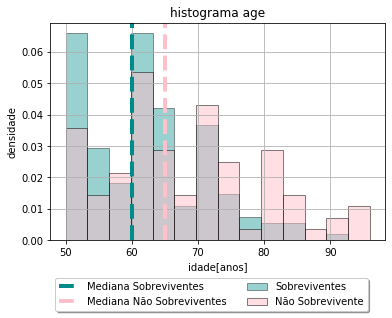

In [9]:
# AGE
age_sobrevivente = dados.loc[sobrevivente, ['age']]
age_nao_sobrevivente = dados.loc[nao_sobrevivente, ['age']]

plota_grafico(age_sobrevivente['age'], age_nao_sobrevivente['age'], 'histograma age', 'idade[anos]', np.linspace(50,96,15))

Observando os gráficos, percebe-se que pacientes até aproximadamente 70 anos, possuem uma taxa de sobrevivencia próxima ou superior à taxa de não sobrevivencia. E a partir de 70, observa-se uma queda na taxa de sobrevivência, e dessa forma, a taxa de não sobrevivência se torna maior.

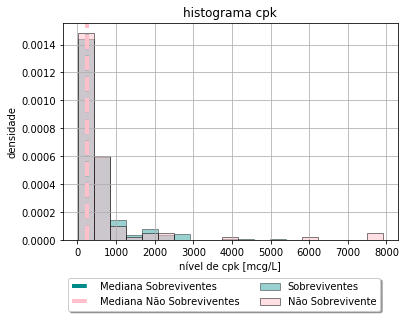

In [10]:
# CREATININE_PHOSPHOKINASE
cpk_sobrevivente = dados.loc[sobrevivente, ['creatinine_phosphokinase']]
cpk_nao_sobrevivente = dados.loc[nao_sobrevivente, ['creatinine_phosphokinase']]

plota_grafico(cpk_sobrevivente['creatinine_phosphokinase'], cpk_nao_sobrevivente['creatinine_phosphokinase'], 'histograma cpk', 'nível de cpk [mcg/L]', np.linspace(20, 7900, 20))

Os resultados do gráfico acima estão próximos, o que dificuta a compreensão. Dessa forma, iremos plotar um novo gráfico com apenas os dados do 3o quartil.

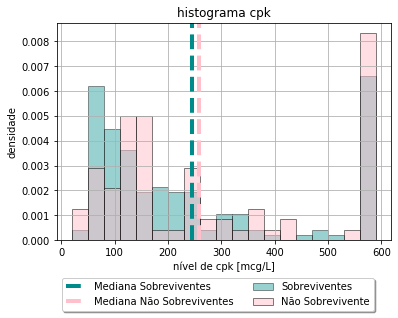

In [11]:
plota_grafico(cpk_sobrevivente['creatinine_phosphokinase'], cpk_nao_sobrevivente['creatinine_phosphokinase'], 'histograma cpk', 'nível de cpk [mcg/L]', np.linspace(20, 590, 20))

Observando o gráfico, percebe-se que o cpk possuí níveis próximos tanto nos pacieentes que sobreviveram e que não sobreviveram. Assim concluímos, que o nível da enzima cpk no sangue dos paciêntes, não afeta diretamente a taxa de sobrevivência.

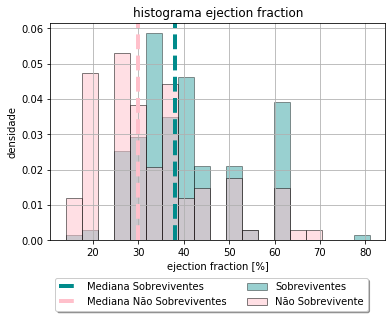

In [12]:
# EJECTION FRACTION
ef_sobrevivente = dados.loc[sobrevivente, ['ejection_fraction']]
ef_nao_sobrevivente = dados.loc[nao_sobrevivente, ['ejection_fraction']]

plota_grafico(ef_sobrevivente['ejection_fraction'], ef_nao_sobrevivente['ejection_fraction'], 'histograma ejection fraction', 'ejection fraction [%]', np.linspace(14, 81, 20))

Pelo gáfico, infere-se que a porcentagem de sangue saindo do coração a cada sístole (ejection fraction) no intervalo de 0 a 30%, a taxa de sobrevivência é inferior à taxa de não sobreviência. Quando os valores são maiores do que 30%, a taxa de sobrevivência e não sobrevivência são mais próximas.

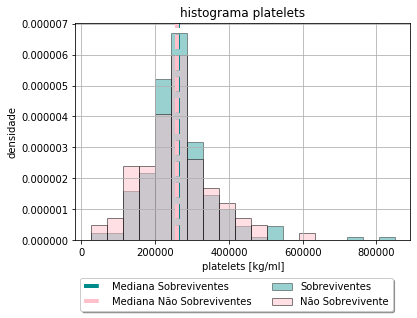

In [13]:
# PLATELETS
platelets_sobrevivente = dados.loc[sobrevivente, ['platelets']]
platelets_nao_sobrevivente = dados.loc[nao_sobrevivente, ['platelets']]

plota_grafico(platelets_sobrevivente['platelets'], platelets_nao_sobrevivente['platelets'], 'histograma platelets', 'platelets [kg/ml]', np.linspace(25100, 850001, 20))

Observando  o gráfico, percebe-se que nas extremidades do gráfico, ou seja, nos níveis mais baixos e altos de plaquetas, as taxas de sobrevivência e de não sobrevivência são similares. Já nos valores intermediários, existe uma diferença maior.


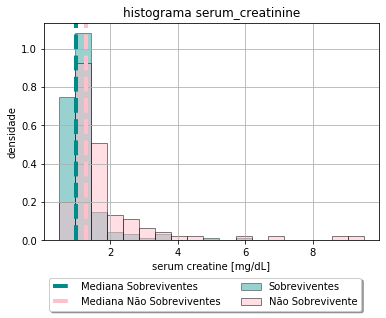

In [14]:
# SERUM CREATININE
sc_sobrevivente = dados.loc[sobrevivente, ['serum_creatinine']]
sc_nao_sobrevivente = dados.loc[nao_sobrevivente, ['serum_creatinine']]

plota_grafico(sc_sobrevivente['serum_creatinine'], sc_nao_sobrevivente['serum_creatinine'], 'histograma serum_creatinine', 'serum creatine [mg/dL]', np.linspace(0.5, 9.5, 20))

Do gráfico, observa-se que quanto menos serum creatine no sangue, maior é a taxa de sobrevivência.

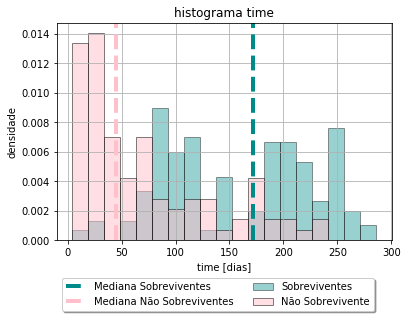

In [15]:
# TIME
time_sobrevivente = dados.loc[sobrevivente, ['time']]
time_nao_sobrevivente = dados.loc[nao_sobrevivente, ['time']]

plota_grafico(time_sobrevivente['time'], time_nao_sobrevivente['time'], 'histograma time', 'time [dias]', np.linspace(4, 286, 20))

Pelo gráfico, observa-se que os pacientes que foram observado por menos tempo possuem uma taxa de não sobrevivência superior a taxa de sobrevivência. Quando o tempo de observação foi maior, as taxas de sobrevivência são maiores também.

### Análise categórica

Inicialmente, vamos visualizar as frequências relativas das variáveis categóricas.

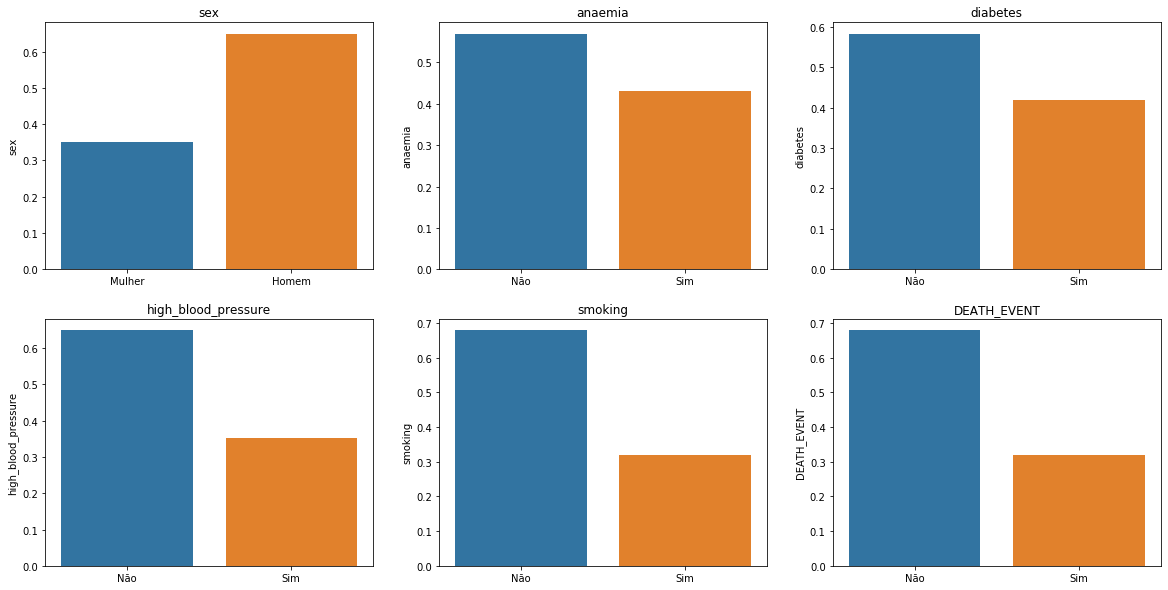

In [16]:
plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
sns.barplot(dados.sex.value_counts(True).index, dados.sex.value_counts(True)).set_title('sex')

plt.subplot(2,3,2)
sns.barplot(dados.anaemia.value_counts(True).index, dados.anaemia.value_counts(True)).set_title('anaemia')

plt.subplot(2,3,3)
sns.barplot(dados.diabetes.value_counts(True).index, dados.diabetes.value_counts(True)).set_title('diabetes')

plt.subplot(2,3,4)
sns.barplot(dados.high_blood_pressure.value_counts(True).index, dados.high_blood_pressure.value_counts(True)).set_title('high_blood_pressure')

plt.subplot(2,3,5)
sns.barplot(dados.smoking.value_counts(True).index, dados.smoking.value_counts(True)).set_title('smoking')

plt.subplot(2,3,6)
sns.barplot(dados.DEATH_EVENT.value_counts(True).index, dados.DEATH_EVENT.value_counts(True)).set_title('DEATH_EVENT')

plt.show()

Vamos separar, da mesma forma que para as variáveis numéricas, os pacientes entre aqueles que sobreviveram e os que não sobreviveram.

Para plotar os gráficos de pizza, criamos a seguinte função:

In [17]:
#ex: plota_pizza(['Tem anemia', 'Não Tem anemia'], anaemia_sobrevivente['anaemia'], anaemia_sobrevivente['anaemia'], 'Sobrevivente', ['Tem anemia', 'Não Tem anemia'], anaemia_nao_sobrevivente['anaemia'], anaemia_nao_sobrevivente['anaemia'],'Não Sobrevivente')
def plota_pizza(legenda_1, sobrev_tem, sobrev_n_tem, titulo_1, legenda_2, n_sobrev_tem, n_sobrev_n_tem, titulo_2):
    plt.figure(figsize=(12, 5))
    labels = legenda_1
    titulos = [sobrev_tem.value_counts(True)[1]*100, sobrev_n_tem.value_counts(True)[0]*100]
    cores = ['darkcyan', 'pink']
    explode = (0.1, 0.1)  
    total = sum(titulos)

    plt.subplot(131)
    plt.pie(titulos, explode = explode, labels = labels, colors = cores, autopct = '%1.1f%%', shadow = True, startangle=90)

    plt.axis('equal') 
    plt.title(titulo_1)

    #NÃO SOBREVIVENTE
    labels = legenda_2
    titulos = [n_sobrev_tem.value_counts(True)[1]*100, n_sobrev_n_tem.value_counts(True)[0]*100]
    cores = ['darkcyan', 'pink']
    explode = (0.1, 0.1)  
    total = sum(titulos)

    plt.subplot(133)
    plt.pie(titulos, explode = explode, labels = labels, colors = cores, autopct = '%1.1f%%', shadow = True, startangle=90)

    plt.axis('equal') 
    plt.title(titulo_2)


    plt.show()

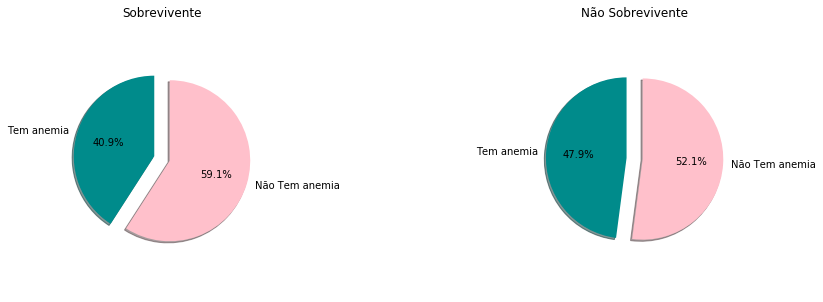

In [18]:
# ANAEMIA
anaemia_sobrevivente = dados.loc[sobrevivente, ['anaemia']]
anaemia_nao_sobrevivente = dados.loc[nao_sobrevivente, ['anaemia']]

plota_pizza(['Tem anemia', 'Não Tem anemia'], anaemia_sobrevivente['anaemia'], anaemia_sobrevivente['anaemia'], 'Sobrevivente', ['Tem anemia', 'Não Tem anemia'], anaemia_nao_sobrevivente['anaemia'], anaemia_nao_sobrevivente['anaemia'],'Não Sobrevivente')

Observando o gráfico, percebe-se que entre os pacientes que não sobreviveram, o índice de anêmicos é em torno de 7% maior do que nos pacientes que sobreviveram.
Entretanto, ser anêmico ou não, parece não influenciar diretamente a morte do paciente.

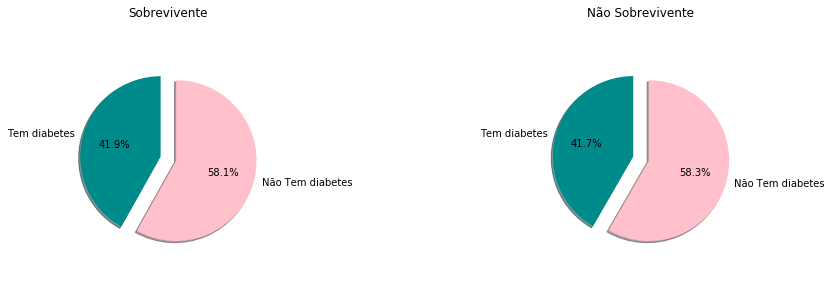

In [19]:
# DIABETES
diabetes_sobrevivente = dados.loc[sobrevivente, ['diabetes']]
diabetes_nao_sobrevivente = dados.loc[nao_sobrevivente, ['diabetes']]

plota_pizza(['Tem diabetes', 'Não Tem diabetes'], diabetes_sobrevivente['diabetes'], diabetes_sobrevivente['diabetes'], 'Sobrevivente', ['Tem diabetes', 'Não Tem diabetes'], diabetes_nao_sobrevivente['diabetes'], diabetes_nao_sobrevivente['diabetes'],'Não Sobrevivente')

Pelo gráfico, observa-se que entre os pacientes que não sobreviveram, o índice de diabéticos é ligeiramente maior do que nos pacientes que sobreviveram.
Logo, ser diabético ou não, parece não influenciar diretamente a morte do paciente.

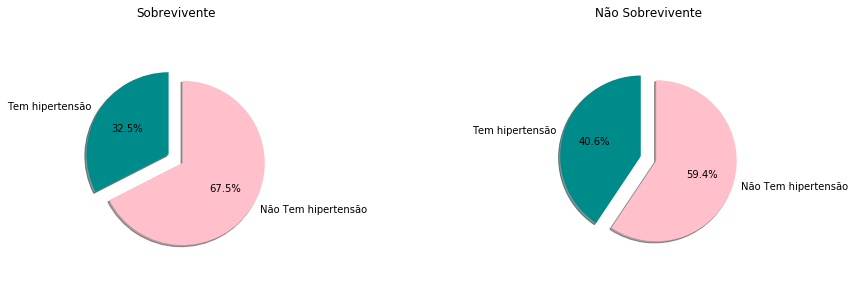

In [20]:
# HIGH BLOOD PRESSURE
hbp_sobrevivente = dados.loc[sobrevivente, ['high_blood_pressure']]
hbp_nao_sobrevivente = dados.loc[nao_sobrevivente, ['high_blood_pressure']]

plota_pizza(['Tem hipertensão', 'Não Tem hipertensão'], hbp_sobrevivente['high_blood_pressure'], hbp_sobrevivente['high_blood_pressure'], 'Sobrevivente', ['Tem hipertensão', 'Não Tem hipertensão'], hbp_nao_sobrevivente['high_blood_pressure'], hbp_nao_sobrevivente['high_blood_pressure'],'Não Sobrevivente')

Observando o gráfico, é possível inferir que entre os pacientes que não sobreviveram, o índice de hipertensos é 8% maior do que nos pacientes que sobreviveram.
Logo, ser hipertenso ou não, já parece influenciar um pouco mais na morte do paciente.

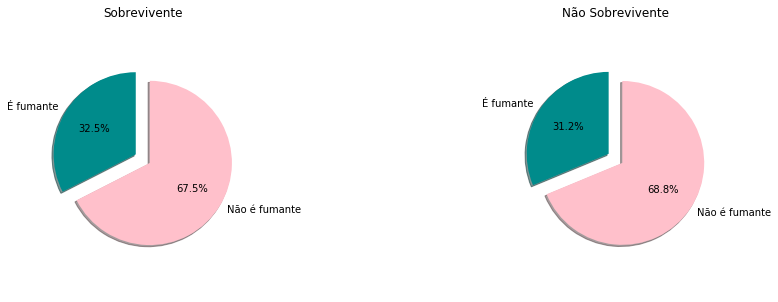

In [21]:
# SMOKING
smoking_sobrevivente = dados.loc[sobrevivente, ['smoking']]
smoking_nao_sobrevivente = dados.loc[nao_sobrevivente, ['smoking']]

plota_pizza(['É fumante', 'Não é fumante'], smoking_sobrevivente['smoking'], smoking_sobrevivente['smoking'], 'Sobrevivente', ['É fumante', 'Não é fumante'], smoking_nao_sobrevivente['smoking'], smoking_nao_sobrevivente['smoking'], 'Não Sobrevivente')

Assim como diabetes, a diferença é muito baixa.

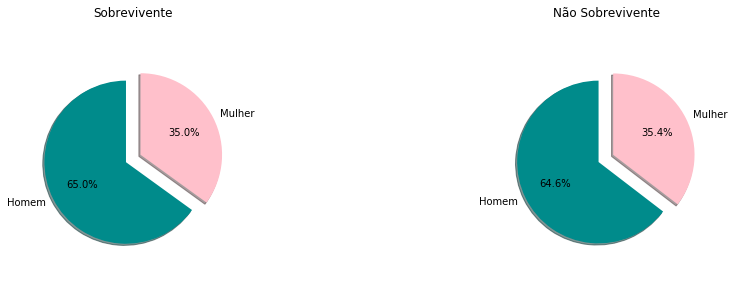

In [22]:
# SEX
sex_sobrevivente = dados.loc[sobrevivente, ['sex']]
sex_nao_sobrevivente = dados.loc[nao_sobrevivente, ['sex']]

plota_pizza(['Homem', 'Mulher'], sex_sobrevivente['sex'], sex_sobrevivente['sex'], 'Sobrevivente', ['Homem', 'Mulher'], sex_nao_sobrevivente['sex'], sex_nao_sobrevivente['sex'], 'Não Sobrevivente')

Assim como ser fumante e diabético, o gênero parece não influenciar diretamente.

___
## Iniciando as previsões


##### Separando os dados em Treinamento e Teste

Para fazer os modelos probabilísticos é necessário que as variáveis categóricas estejam representadas de forma binária. Dessa forma, iremos utilizar o dataframe original sem a alteração dos nomes das variáveis categóricas.

Lembrando que:
- anaemia: (0 = Não possui; 1 = Possui)
- high blood pressure: (0 = Não possui; 1 = Possui)
- diabetes: (0 = Não possui; 1 = Possui)
- sex: (0 = Mulher; 1 = Homem)
- smoking: (0 = Não fuma; 1 = Fuma)
- death event: (0 = Sobrevivente; 1 = Não Sobrevivente)

In [23]:
dados_com_numeros = pd.read_excel(filename)
dados_com_numeros

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Para fazer previsões utilizando modelos classificadores, é necessário, primeiramente, separar o dataframe em features, que são as variáveis como, por exemplo, idade e gênero, e em target, que é a variável DEATH_EVENT que indica que se o paciente sobreviveu.

In [24]:
# Criando uma variável que contém as features e remove a coluna com o target ("DEATH_EVENT")
lista_features = list(dados_com_numeros.columns)
lista_features.remove('DEATH_EVENT')

X = dados_com_numeros.loc[:, lista_features]
# Verificando se a variável contém somente as features
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [25]:
# Criando uma variável que contém o target ("DEATH_EVENT")
y = dados_com_numeros['DEATH_EVENT']

# Verificando se a variável contém somente o target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

Para utilizar os modelos probabilísticos, também é necessário, em um primeiro momento treinar o nosso classificador e, mais tarde, testá-lo. Para isso, vamos separar nossa base de dados em Treinamento e Teste. Essas bases de dados também estarão divididas em features (representadas pela variável X) e em target (representada pela variável Y).

In [26]:
# Separando aleatoriamente os dados da base de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

*Treinamento*

In [27]:
# Juntando a tabela dos features e target para o Treinamento
train = X_train.join(y_train, how = 'inner')
train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
101,75,0,582,0,45,1,263358.03,1.18,137,1,0,87,0
69,65,0,113,1,25,0,497000.00,1.83,135,1,0,67,1
31,85,0,23,0,45,0,360000.00,3.00,132,1,0,28,1
172,70,1,171,0,60,1,176000.00,1.10,145,1,1,146,0
148,75,1,582,0,30,0,225000.00,1.83,134,1,0,113,1


*Teste*

In [28]:
# Juntando a tabela dos features e target para o Teste
test = X_test.join(y_test, how = 'inner')
test.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
281,70,0,582,0,40,0,51000.0,2.7,136,1,1,250,0
265,50,1,298,0,35,0,362000.0,0.9,140,1,1,240,0
164,45,0,2442,1,30,0,334000.0,1.1,139,1,0,129,1
9,80,1,123,0,35,1,388000.0,9.4,133,1,1,10,1
77,42,0,102,1,40,0,237000.0,1.2,140,1,0,74,0


### Modelando as previsões

In [29]:
# Importando as bibliotecas necessárias para implementar os modelos
from sklearn import svm 
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import (confusion_matrix, accuracy_score) 
import seaborn as sn

#### Decision Tree

In [30]:
# Importanto o modelo probabilístico Decision Tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# Utilizando o modelo Decision Tree
modelo_decision_tree = DecisionTreeClassifier(max_depth = 7, random_state = 0)

# Treinando o modelo
modelo_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

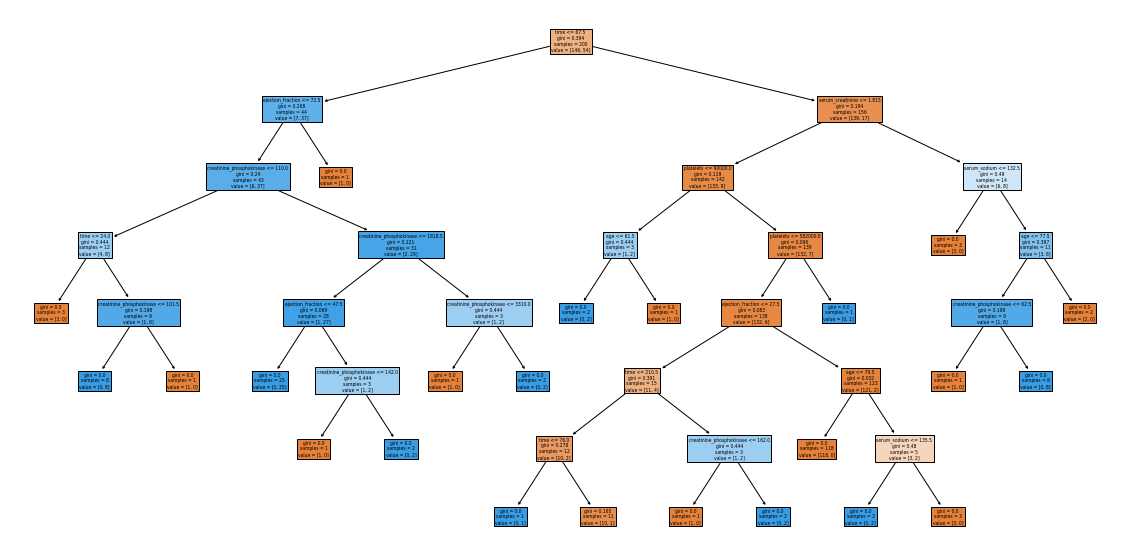

In [31]:
plt.figure(figsize = (20, 10))
tree.plot_tree(modelo_decision_tree, feature_names = lista_features, filled = True)
plt.show()

Valores dados: [0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1]
 
Valores previstos pelo modelo: [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]
 
Matriz de Confusão: 
 [[48  9]
 [18 24]]


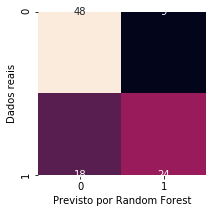

In [62]:
# Prevendo o modelo
previsao_decision_tree = modelo_decision_tree.predict(X_test)

# Imprimindo valores
print('Valores dados:', list(y_test.values)) 
print(' ')
print('Valores previstos pelo modelo:', list(previsao_decision_tree))

# Matriz de confusão
matriz_decision_tree = confusion_matrix(y_test, previsao_decision_tree)
print(' ')
print ("Matriz de Confusão: \n", matriz_decision_tree)  
# Para visualização:
plt.figure(figsize = (3, 3))
sn.heatmap(matriz_decision_tree, annot_kws = {"size": 10}, annot = True)
plt.xlabel('Previsto por Random Forest')
plt.ylabel('Dados reais')
plt.show()

In [33]:
# Tabela que mostra a comparação entre a nossa classificação e a classificação do classificador
tabela_comparativa = pd.crosstab(y_test, previsao_decision_tree, margins = True, normalize = 'index')
tabela_comparativa

col_0,0,1
DEATH_EVENT,,
0,0.842105,0.157895
1,0.428571,0.571429
All,0.666667,0.333333


Pela tabela comparativa acima, podemos perceber que o modelo de Decision Tree apresenta um número de acerto bastante considerável de 84,2% para quando o paciente sobrevive. Porém, quando analisamos os pacientes que morreram, o modelo tem apenas 57% de acerto. 

In [34]:
# Acurácia do modelo
print('Acurácia do modelo Decision Tree: ', accuracy_score(y_test, previsao_decision_tree))

Acurácia do modelo Decision Tree:  0.7272727272727273


#### Random Forest

Valores dados: [0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1]
 
Valores previstos: [1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0]
 
Matriz de Confusão: 
 [[53  4]
 [20 22]]
 


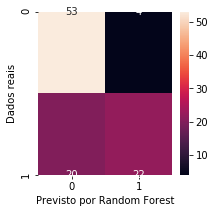

In [67]:
# Vamos importar as bibliotecas do modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

# Utilizando o modelo Random Forest
modelo_random_forest = RandomForestClassifier(n_estimators = 100)
modelo_random_forest.fit(X_train, y_train)

# Prevendo o modelo Random Forest
previsao_modelo_forest = modelo_random_forest.predict(X_test)

# Imprimindo valores
print('Valores dados:', list(y_test.values)) 
print(' ')
print('Valores previstos:', previsao_modelo_forest) 

# Matriz de confusão
matriz_random_forest = confusion_matrix(y_test, previsao_modelo_forest)
print(' ')
print ("Matriz de Confusão: \n", matriz_random_forest)
print(' ')
# Para visualização:
plt.figure(figsize = (3, 3))
sn.heatmap(matriz_random_forest, annot_kws = {"size": 10}, annot = True)
plt.xlabel('Previsto por Random Forest')
plt.ylabel('Dados reais')
plt.show()

In [68]:
# Tabela que mostra a comparação entre a nossa classificação e a classificação do classificador
tabela_comparativa = pd.crosstab(y_test, previsao_modelo_forest, margins = True, normalize = 'index')
tabela_comparativa

col_0,0,1
DEATH_EVENT,,
0,0.929825,0.070175
1,0.476190,0.523810
All,0.737374,0.262626


Da mesma forma que no modelo anterior, o Random Forest tem uma alta porcentagem de acerto para classificar os pacientes que sobreviveram. Porém o modelo continua tendo resultados medianos para classificar os pacientes que não sobreviveram.

In [69]:
# Acurácia do modelo Random Forest
print('Acurácia do modelo: ', accuracy_score(y_test, previsao_modelo_forest))

Acurácia do modelo:  0.7575757575757576


Podemos, a partir do modelo, descobrir quais as features que tem maior importância na hora de classificar se o paciente morreu ou não. Observe:

In [70]:
# Vamos plotar as features que são as mais importantes de acordo com o modelo do Random Forest
importancia_features = pd.Series(modelo_random_forest.feature_importances_, index = lista_features).sort_values(ascending=False)
importancia_features

time                        0.355117
serum_creatinine            0.141212
ejection_fraction           0.136563
age                         0.080198
platelets                   0.078771
serum_sodium                0.073803
creatinine_phosphokinase    0.072540
sex                         0.013947
diabetes                    0.013229
smoking                     0.012527
anaemia                     0.011100
high_blood_pressure         0.010992
dtype: float64

#### Regressão Logística

_Utilizando a biblioteca statsmodel_

In [71]:
# Vamos importar as bibliotecas do modelo Regressão Logística
import statsmodels.api as sm 

# Utilizando o modelo Regressão Logística
modelo_regressao_logistica = sm.Logit(y_train, X_train).fit() 

Optimization terminated successfully.
         Current function value: 0.320643
         Iterations 7


In [72]:
# Imprimindo um resumo da Regressão Logística 
modelo_regressao_logistica.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  200
Model:                          Logit   Df Residuals:                      188
Method:                           MLE   Df Model:                           11
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                  0.4503
Time:                        14:05:22   Log-Likelihood:                -64.129
converged:                       True   LL-Null:                       -116.65
Covariance Type:            nonrobust   LLR p-value:                 1.780e-17
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
age                          0.0592      0.021      2.769      0.006       0.017       0.101
anaemia                     -0.4807      0.506     -0.950      0.342      -1.472       0.511
creatinine_phosphokinase  7.608e-05      0.000      0.357      0.721      -0.000       0.000
diabetes                     0.2775      0.465      0.596      0.551      -0.635       1.190
ejection_fraction           -0.0791      0.022     -3.558      0.000      -0.123      -0.036
high_blood_pressure         -0.1711      0.477     -0.358      0.720      -1.106       0.764
platelets                -1.838e-06   2.42e-06     -0.760      0.447   -6.58e-06     2.9e-06
serum_creatinine             0.9279      0.230      4.041      0.000       0.478       1.378
serum_sodium                 0.0028      0.012      0.234      0.815      -0.021       0.027
sex                         -0.9521      0.531     -1.793      0.073      -1.993       0.089
smoking                      0.3836      0.576      0.666      0.505      -0.745       1.512
time                        -0.0224      0.004     -5.442      0.000      -0.030      -0.014
============================================================================================
"""

Valores dados: [0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1]
 
Valores previstos: [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1]
 
Confusion Matrix : 
 [[54  3]
 [20 22]]


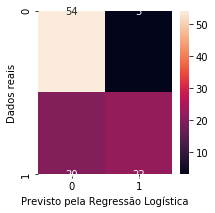

In [80]:
# Prevendo o modelo Regressão Logística
previsao_modelo_regressao_logistica = modelo_regressao_logistica.predict(X_test)
prediction = list(map(round, previsao_modelo_regressao_logistica)) 

# Imprimindo valores
print('Valores dados:', list(y_test.values))
print(' ')
print('Valores previstos:', list(prediction)) 

# Observando a acurácia do nosso modelo de acordo com Regressão Logística
metrics.accuracy_score(prediction, y_test)
  
# Matriz de confusão
matriz_regressao_logistica = confusion_matrix(y_test, prediction)
print(' ')
print ("Confusion Matrix : \n", matriz_regressao_logistica) 
# Para visualização:
plt.figure(figsize = (3, 3))
sn.heatmap(matriz_regressao_logistica, annot_kws = {"size": 10}, annot = True)
plt.xlabel('Previsto pela Regressão Logística')
plt.ylabel('Dados reais')
plt.show()

_Utilizando a biblioteca sklearn_

In [74]:
# Vamos importar as bibliotecas  do modelo Regressão Logística
from sklearn.linear_model import LogisticRegression

# Utilizando a função Regressão Logística com todas as features da base de dados
modelo_regressao_logistica = LogisticRegression(solver='lbfgs', multi_class='auto')
modelo_regressao_logistica.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
# Imprimindo os coeficientes
modelo_regressao_logistica.coef_[0]
coef_absoluto_modelo_logistico = []
for i in modelo_regressao_logistica.coef_[0]:
    a = abs(i)
    coef_absoluto_modelo_logistico.append(a)

coef = pd.DataFrame(data = {'Coeficientes': coef_absoluto_modelo_logistico, 'Features': X_train.columns})
coef.sort_values('Coeficientes', ascending = False)

,Coeficientes,Features
11,0.021432,time
0,0.009976,age
8,0.009390,serum_sodium
4,0.003059,ejection_fraction
7,0.000879,serum_creatinine
3,0.000051,diabetes
2,0.000051,creatinine_phosphokinase
5,0.000025,high_blood_pressure
1,0.000012,anaemia
10,0.000008,smoking


Valores dados: [0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1]
 
Valores previstos: [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1]
 
Confusion Matrix : 
 [[54  3]
 [20 22]]


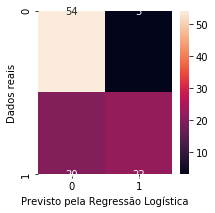

In [76]:
previsao_modelo_regressao_logistica = modelo_regressao_logistica.predict(X_test)

# Imprimindo valores
print('Valores dados:', list(y_test.values)) 
print(' ')
print('Valores previstos:', list(previsao_modelo_regressao_logistica)) 

# Matriz de confusão
matriz_regressao_logistica = confusion_matrix(y_test, previsao_modelo_regressao_logistica)
print(' ')
print ("Confusion Matrix : \n", matriz_regressao_logistica) 
# Para visualização:
plt.figure(figsize = (3, 3))
sn.heatmap(matriz_regressao_logistica, annot_kws = {"size": 10}, annot = True)
plt.xlabel('Previsto pela Regressão Logística')
plt.ylabel('Dados reais')
plt.show()

Da matriz de confusão acima, podemos perceber que as cores mais claras estão na diagonal principal. Esses valores correspondem aos acertos do modelo, ou seja, quando o paciente sobreviveu ou morreu e foi classificado corretamente.

In [78]:
# Tabela que mostra a comparação entre a nossa classificação e a classificação do classificador
tabela_comparativa = pd.crosstab(y_test, previsao_modelo_regressao_logistica, margins = True, normalize = 'index')
tabela_comparativa

col_0,0,1
DEATH_EVENT,,
0,0.947368,0.052632
1,0.476190,0.523810
All,0.747475,0.252525


Na tabela comparativa acima, podemos perceber que, da mesma forma que os outros dois modelos, o classificador tem alta porcentagem de acerto quando classifica sobreviventes. Essa alta porcentagem pode ser observe inclusive na matriz de confusão plotada anteriormente.

In [77]:
# Acurácia do modelo Regressão Logística
print('Acurácia do modelo: ', accuracy_score(y_test, previsao_modelo_regressao_logistica))

Acurácia do modelo:  0.7676767676767676


##### Refazendo os modelos com as features importantes

Com os resultados anteriores, observamos quais eram as features que mais influenciavam na classificação do paciente em cada modelo. Dentre as mais comuns estão `time`, `serum_creatinine`, `ejection_fraction`, `age`. Assim, vamos refazer os modelos considerando apenas essas features.

In [82]:
#Definindo uma lista com as features importantes
features_importantes = ['time', 'serum_creatinine', 'ejection_fraction', 'age']

X_train_importantes = X_train.loc[:, features_importantes]
X_test_importantes = X_test.loc[:, features_importantes]

#### Random Forest

Valores dados: [0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1]
 
Valores previstos: [1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1]
 
Matriz de Confusão: 
 [[49  8]
 [16 26]]
 


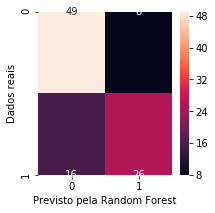

In [91]:
# Utilizando o modelo Random Forest
modelo_random_forest_importantes = RandomForestClassifier(n_estimators = 100)
modelo_random_forest_importantes.fit(X_train_importantes, y_train)

# Prevendo o modelo Random Forest
previsao_modelo_forest_importantes = modelo_random_forest_importantes.predict(X_test_importantes)

# Imprimindo valores
print('Valores dados:', list(y_test.values)) 
print(' ')
print('Valores previstos:', previsao_modelo_forest_importantes) 

# Matriz de confusão
matriz_random_forest_importantes = confusion_matrix(y_test, previsao_modelo_forest_importantes)
print(' ')
print ("Matriz de Confusão: \n", matriz_random_forest_importantes)
print(' ')
# Para visualização:
plt.figure(figsize = (3, 3))
sn.heatmap(matriz_random_forest_importantes, annot_kws = {"size": 10}, annot = True)
plt.xlabel('Previsto pela Random Forest')
plt.ylabel('Dados reais')
plt.show()

In [92]:
# Tabela que mostra a comparação entre a nossa classificação e a classificação do classificador
tabela_comparativa = pd.crosstab(y_test, previsao_modelo_forest_importantes, margins = True, normalize = 'index')
tabela_comparativa

col_0,0,1
DEATH_EVENT,,
0,0.859649,0.140351
1,0.380952,0.619048
All,0.656566,0.343434


Pela tabela comparativa, percebe-se que houve uma melhora ligeira na classificação dos pacientes que não sobreviveram quando consideramos apenas as features importantes. 

In [93]:
# Acurácia do modelo Random Forest
print('Acurácia do modelo: ', accuracy_score(y_test, previsao_modelo_forest_importantes))

Acurácia do modelo:  0.7575757575757576


Observamos que a acurácia do modelo teve um pequeno aumento quando consideramos apenas as features importantes.

#### Regressão Logística

Valores dados: [0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1]
 
Valores previstos: [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1]
 
Confusion Matrix: 
 [[53  4]
 [15 27]]


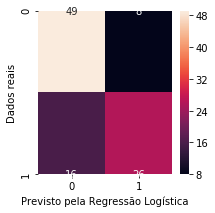

In [97]:
# Utilizando a função Regressão Logística com todas as features da base de dados
modelo_regressao_logistica_importantes = LogisticRegression(solver='lbfgs', multi_class='auto')
modelo_regressao_logistica_importantes.fit(X_train_importantes, y_train)

previsao_modelo_regressao_logistica_importantes = modelo_regressao_logistica_importantes.predict(X_test_importantes)

# Imprimindo valores
print('Valores dados:', list(y_test.values)) 
print(' ')
print('Valores previstos:', list(previsao_modelo_regressao_logistica_importantes)) 

# Observando a acurácia do nosso modelo de acordo com Regressão Logística
metrics.accuracy_score(previsao_modelo_regressao_logistica_importantes, y_test)

# confusion matrix 
matriz_regressao_logistica_importantes = confusion_matrix(y_test, previsao_modelo_regressao_logistica_importantes)
print(' ')
print ("Confusion Matrix: \n", matriz_regressao_logistica_importantes)
# Para visualização:
plt.figure(figsize = (3, 3))
sn.heatmap(matriz_random_forest_importantes, annot_kws = {"size": 10}, annot = True)
plt.xlabel('Previsto pela Regressão Logística')
plt.ylabel('Dados reais')
plt.show()

In [98]:
# Tabela que mostra a comparação entre a nossa classificação e a classificação do classificador
tabela_comparativa = pd.crosstab(y_test, previsao_modelo_regressao_logistica_importantes, margins = True, normalize = 'index')
tabela_comparativa

col_0,0,1
DEATH_EVENT,,
0,0.929825,0.070175
1,0.357143,0.642857
All,0.686869,0.313131


Da mesma forma que o modelo Random Forest, a classificação melhora relativamente para os pacientes que não sobreviveram.

In [99]:
# Acurácia do modelo Regressão Logística
print('Acurácia do modelo: ', accuracy_score(y_test, previsao_modelo_regressao_logistica_importantes))

Acurácia do modelo:  0.8080808080808081


A acurácia do modelo da Regressão Logística quando consideramos apenas as features importantes é maior. 